# Wikipedia Notable Life Expectancies

# [Notebook 5 of : Data Cleaning](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_data_clean4_thanak_2022_06_23.ipynb)

## Context

The


## Objective

The

### Data Dictionary

- Feature: Description

## Importing Necessary Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np
import re

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 200)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some visualization attributes
pd.set_option("max_colwidth", 150)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### Reading, Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
conn = sql.connect("wp_life_expect_clean3.db")
data = pd.read_sql("SELECT * FROM wp_life_expect_clean3", conn)

# Making a working copy
df = data.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 132652 rows and 24 columns.


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,None,dancer,ballet designer director,None,None,None,None,None,None,None,None,86.0,None,United Kingdom of Great Britain and Northern Ireland,None,None
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,None,economist,writer,and academic,None,None,None,None,None,None,None,68.0,None,Ireland,None,None


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
132650,9,Oleg Moliboga,", 69, Russian volleyball player, Olympic champion and coach.",https://en.wikipedia.org/wiki/Oleg_Moliboga,2,2022,June,,None,volleyball player,Olympic champion coach,None,None,None,None,None,None,None,None,69.0,None,Russia,None,1980
132651,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,June,None,None,engineer,member of the Academy of Engineering,None,None,None,None,None,None,None,None,86.0,None,"China, People's Republic of",None,None


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
35551,9,Mindrolling Trichen,", 78, Tibetan ceremonial head of the Nyingma school of Tibetan Buddhism.",https://en.wikipedia.org/wiki/Mindrolling_Trichen,5,2008,February,None,None,ceremonial head of the Nyingma school of Buddhism,None,None,None,None,None,None,None,None,None,78.0,None,"China, People's Republic of",None,None
19298,13,Ray Robinson,", 61, English cricketer.",https://en.wikipedia.org/wiki/Ray_Robinson_(sportsman),2,2001,November,None,None,cricketer,None,None,None,None,None,None,None,None,None,61.0,None,United Kingdom of Great Britain and Northern Ireland,None,None
80673,2,Reid Scott,", 89, Canadian politician and judge.",https://en.wikipedia.org/wiki/Reid_Scott,9,2016,March,None,None,politician judge,None,None,None,None,None,None,None,None,None,89.0,None,Canada,None,None
110616,8,Hiphei,", 82, Indian politician, MP .",https://en.wikipedia.org/wiki/Hiphei,5,2020,April,,None,politician,MP,None,None,None,None,None,None,None,None,82.0,None,India,None,1990 2002
121107,6,Jack Veneno,", 78, Dominican professional wrestler and politician, pancreatic cancer.",https://en.wikipedia.org/wiki/Jack_Veneno,16,2021,April,WWC,None,professional wrestler politician,pancreatic cancer,None,None,None,None,None,None,None,None,78.0,None,Dominican Republic,None,WWC


<IPython.core.display.Javascript object>

### Checking Data Types, Duplicates, and Null Values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132652 entries, 0 to 132651
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   day                132652 non-null  object 
 1   name               132652 non-null  object 
 2   info               132652 non-null  object 
 3   link               132652 non-null  object 
 4   num_references     132652 non-null  object 
 5   year               132652 non-null  int64  
 6   month              132652 non-null  object 
 7   info_parenth       49830 non-null   object 
 8   info_1             35 non-null      object 
 9   info_2             132604 non-null  object 
 10  info_3             62571 non-null   object 
 11  info_4             12605 non-null   object 
 12  info_5             1497 non-null    object 
 13  info_6             216 non-null     object 
 14  info_7             31 non-null      object 
 15  info_8             6 non-null       object 
 16  in

<IPython.core.display.Javascript object>

#### Observations:
- Due to the diversity of entries for `known_for`, we may need to prioritize entries for the extraction of this feature.
- To do so, we will proceed with typecasting num_references as integer, so we can determine which entries have more references.
- We will also make a copy of the `info_parenth` column, as we will alter that column and the information it contains is no longer present in the original `info` column.

#### Typecasting `num_references` as Integer

In [6]:
# Typecasting num_references as int64
df.loc[:, "num_references"] = df.loc[:, "num_references"].astype("int64")

<IPython.core.display.Javascript object>

#### Loading `nation_map` from Pickle File to Dictionary nation_map

In [7]:
# Load the nation_map
with open("nation_map.pkl", "rb") as f:
    nation_map = pickle.load(f)

<IPython.core.display.Javascript object>

#### Loading `other_species` list from other_species.csv

In [8]:
# Loading other_species list
other_species_df = pd.read_csv("other_species.csv")
other_species = other_species_df["species"].tolist()
other_species = list(
    set(other_species)
)  # To avoid searching duplicates as we have been adding back to same csv file

<IPython.core.display.Javascript object>

### `num_references`

In [9]:
df["num_references"].describe()

count    132652.000000
mean          9.790406
std          19.436805
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         837.000000
Name: num_references, dtype: float64

<IPython.core.display.Javascript object>

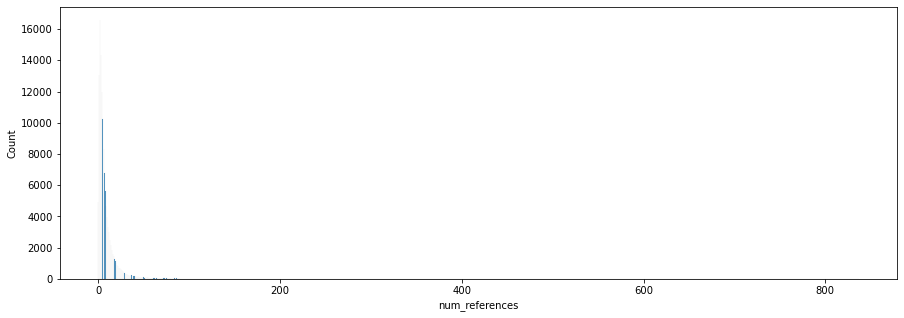

<IPython.core.display.Javascript object>

In [10]:
# Histplot of num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="num_references")
plt.show()

#### Observations:
- The distribution of `num_references` is highly right skewed.
- We will verify some verifying of links to make sure the pages are for individuals.

In [11]:
# Example of verifying links (repeated in groups of 100 until num_references <100)
df.sort_values(by="num_references", ascending=False)[:10]

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
36579,19,Bill Andress,", 83, American baseball umpire.",https://en.wikipedia.org/wiki/Bill_Andress,837,2008,May,None,None,baseball umpire,None,None,None,None,None,None,None,None,None,83.0,None,United States of America,None,None
11356,14,Frank Sinatra,", 82, American singer , heart attack.",https://en.wikipedia.org/wiki/Frank_Sinatra,660,1998,May,"""My Way"", ""That Life"" actor Oscar, winner",None,singer,heart attack,None,None,None,None,None,None,None,None,82.0,None,United States of America,None,"""My Way"", ""That Life"" actor Oscar, 1954 winner"
35265,17,Bobby Fischer,", 64, American chess grandmaster, world champion , kidney failure.",https://en.wikipedia.org/wiki/Bobby_Fischer,631,2008,January,,None,chess grandmaster,world champion,kidney failure,None,None,None,None,None,None,None,64.0,None,United States of America,None,1972 1975
26014,11,Keith Miller,", 84, Australian Test cricketer, Australian rules footballer, fighter pilot and journalist.",https://en.wikipedia.org/wiki/Keith_Miller,586,2004,October,None,None,Test cricketer,rules footballer,fighter pilot journalist,None,None,None,None,None,None,None,84.0,None,Australia,Australia,None
35003,28,Benazir Bhutto,", 54, Pakistani opposition leader and former prime minister , assassinated.",https://en.wikipedia.org/wiki/Benazir_Bhutto,554,2007,December,",",None,opposition leader former prime minister,assassinated,None,None,None,None,None,None,None,None,54.0,None,Pakistan,None,"1988 1990, 1993 1996"
85511,25,Fidel Castro,", 90, Cuban politician, Prime Minister .",https://en.wikipedia.org/wiki/Fidel_Castro,531,2016,November,", President",None,politician,Prime Minister,None,None,None,None,None,None,None,None,90.0,None,Cuba,None,"1959 1976, President 1976 2008"
60287,5,Hugo Chávez,", 58, Venezuelan politician and military officer, President , heart attack.",https://en.wikipedia.org/wiki/Hugo_Ch%C3%A1vez,529,2013,March,since,None,politician military officer,President,heart attack,None,None,None,None,None,None,None,58.0,None,Venezuela,None,since 1999
97905,25,John McCain,", 81, American politician and Navy officer, member of the U.S. Senate , glioblastoma.",https://en.wikipedia.org/wiki/John_McCain,528,2018,August,since House of Representatives,None,politician Navy officer,member of the Senate,glioblastoma,None,None,None,None,None,None,None,81.0,None,United States of America,None,since 1987 House of Representatives 1983 1987
51541,20,Muammar Gaddafi,", 69, Libyan leader , shooting.",https://en.wikipedia.org/wiki/Muammar_Gaddafi,519,2011,October,,None,leader,shooting,None,None,None,None,None,None,None,None,69.0,None,Libya,None,1969 2011
105520,6,Robert Mugabe,", 95, Zimbabwean revolutionary and politician, President , cancer.",https://en.wikipedia.org/wiki/Robert_Mugabe,519,2019,September,Prime Minister,None,revolutionary politician,President,cancer,None,None,None,None,None,None,None,95.0,None,Zimbabwe,None,1987 2017 Prime Minister 1980 1987


<IPython.core.display.Javascript object>

#### Observations:
- Some links point to lists, such as the entry with the maximum `num_references` for Bill Andress.
- Also, there are several entries that point to a list of German World War II medal recipiants.
- We will make a list of these links and change their `num_references` values to 1.

In [12]:
# Creating list of links containing "German" with over 20 references
checklist = [
    index
    for index in df.index
    if "German" in df.loc[index, "info"] and df.loc[index, "num_references"] > 20
]
link_list = df.loc[checklist, "link"].tolist()

<IPython.core.display.Javascript object>

In [13]:
# # Code used to go verify links
# print(link_list.pop())

<IPython.core.display.Javascript object>

In [14]:
# List of links that point to pages with lists of individuals
link_is_list = [
    "https://en.wikipedia.org/wiki/Bill_Andress",
    "https://en.wikipedia.org/wiki/Joachim_Boosfeld",
    "https://en.wikipedia.org/wiki/Alfred_Eick",
    "https://en.wikipedia.org/wiki/Gerhard_Fischer_(soldier)",
    "https://en.wikipedia.org/wiki/Arthur_B%C3%BCssecke",
    "https://en.wikipedia.org/wiki/Hans-G%C3%BCnther_Lange",
    "https://en.wikipedia.org/wiki/Waldemar_von_Gazen",
    "https://en.wikipedia.org/wiki/Heinz_Angelmaier",
    "https://en.wikipedia.org/wiki/Herbert_Fries",
    "https://en.wikipedia.org/wiki/Friedrich_Carl_(officer)",
    "https://en.wikipedia.org/wiki/Karl-Heinz_Altermann",
    "https://en.wikipedia.org/wiki/Paul_Brasack",
    "https://en.wikipedia.org/wiki/Walther_Gerhold",
    "https://en.wikipedia.org/wiki/Siegfried_Gerstner",
    "https://en.wikipedia.org/wiki/Alois_Schnaubelt",
    "https://en.wikipedia.org/wiki/Karl-Heinz_Wiebe",
    "https://en.wikipedia.org/wiki/Hans-Hermann_Sturm",
    "https://en.wikipedia.org/wiki/Siegfried_Jamrowski",
    "https://en.wikipedia.org/wiki/Franz_Kieslich",
    "https://en.wikipedia.org/wiki/Wilhelm_Lehner",
    "https://en.wikipedia.org/wiki/Fritz_Langanke",
    "https://en.wikipedia.org/wiki/Achim_Wunderlich",
    "https://en.wikipedia.org/wiki/Viktor_Vitali",
    "https://en.wikipedia.org/wiki/Wilhelm_Noller",
    "https://en.wikipedia.org/wiki/Heinrich_Sonne",
    "https://en.wikipedia.org/wiki/Ludwig_Meister",
    "https://en.wikipedia.org/wiki/Oskar_Sch%C3%A4fer",
    "https://en.wikipedia.org/wiki/Karl_Brommann",
    "https://en.wikipedia.org/wiki/Friedrich_Adrario",
    "https://en.wikipedia.org/wiki/Werner_Freiherr_von_Beschwitz",
    "https://en.wikipedia.org/wiki/Hans-Georg_Borck",
    "https://en.wikipedia.org/wiki/Wilhelm_Weidenbr%C3%BCck",
    "https://en.wikipedia.org/wiki/Klaus_Feldt",
    "https://en.wikipedia.org/wiki/Erwin_Bachmann",
    "https://en.wikipedia.org/wiki/List_of_Knight%27s_Cross_of_the_Iron_Cross_recipients_(Bn%E2%80%93Bz)",
    "https://en.wikipedia.org/wiki/List_of_German_supercentenarians#Hermann_Dörnemann",
    "https://en.wikipedia.org/wiki/List_of_Knight%27s_Cross_of_the_Iron_Cross_recipients_(Ba%E2%80%93Bm)",
    "https://en.wikipedia.org/wiki/Family_of_Barack_Obama#Stanley_Armour_Dunham",
]

<IPython.core.display.Javascript object>

#### Changing `num_references` to 1 Where Entry Link Points to a List Page

In [15]:
# Creating list of row indexes with links that point to lists
rows_to_treat = [index for index in df.index if df.loc[index, "link"] in link_is_list]

# Treating num_references for these entries
df.loc[rows_to_treat, "num_references"] = 1

# Checking a sample of rows
df.loc[rows_to_treat, :].sample(2)

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy
58529,11,Alois Schnaubelt,", 91, German Nazi soldier, awarded Knight's Cross of the Iron Cross .",https://en.wikipedia.org/wiki/Alois_Schnaubelt,1,2012,December,,None,soldier,awarded Knight Cross of the Iron Cross,None,None,None,None,None,None,None,None,91.0,None,Germany,Germany,1944
55893,10,Fritz Langanke,", 92, German Waffen SS lieutenant during World War II and Iron Cross recipient.",https://en.wikipedia.org/wiki/Fritz_Langanke,1,2012,July,None,None,Waffen SS lieutenant during World War II Iron Cross recipient,None,None,None,None,None,None,None,None,None,92.0,None,Germany,None,None


<IPython.core.display.Javascript object>

#### Observations:
- With those entries treated, and the other top entries verified, let us take another look at the summary statistics and distribution of `num_references`.

In [16]:
# Summary statistics of updated num_references
df["num_references"].describe()

count    132652.000000
mean          9.736016
std          19.066372
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         660.000000
Name: num_references, dtype: float64

<IPython.core.display.Javascript object>

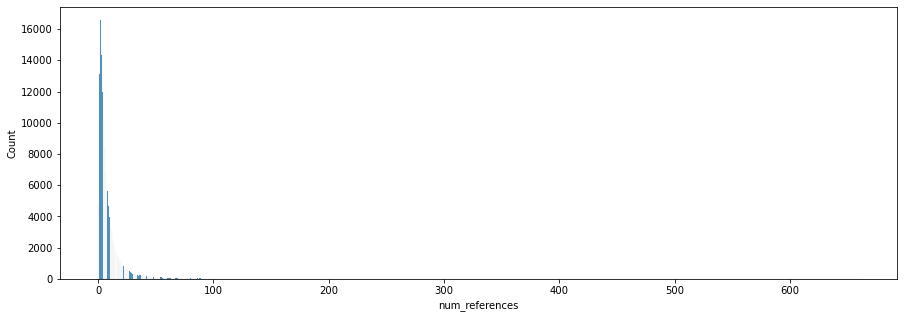

<IPython.core.display.Javascript object>

In [17]:
# Histplot of updated num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="num_references")
plt.show()

#### Observations:
- The distribution of `num_references` remains highly right skewed.
- 25% of entries have 2 or fewer references, which may be a good cutoff to search for `known_for` values.
- Let us view the log transformation of the feature, both for the full dataset, and for `num_references` > 2.

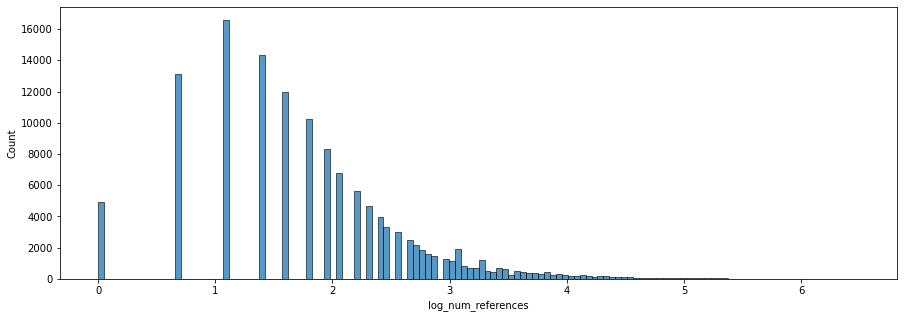

<IPython.core.display.Javascript object>

In [18]:
# Adding column for log_num_references
df["log_num_references"] = df["num_references"].apply(lambda x: np.log(x + 1))

# Histplot of log_num_references
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x="log_num_references")
plt.show()

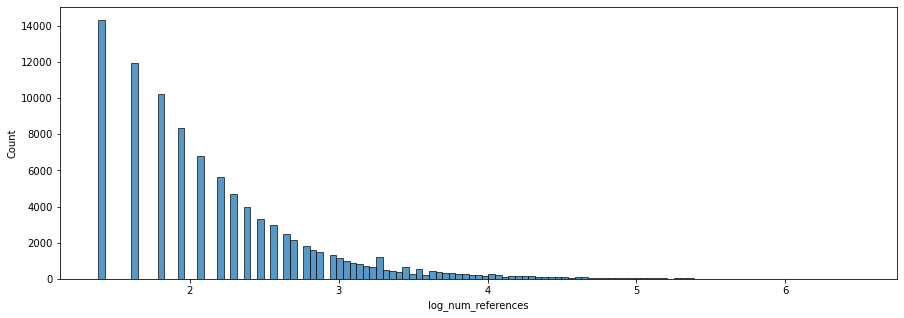

<IPython.core.display.Javascript object>

In [19]:
# Histplot of log_num_references where num_references > 2
plt.figure(figsize=(15, 5))
sns.histplot(data=df[df["num_references"] > 2], x="log_num_references")
plt.show()

#### Observations:
- The distribution is certainly more normalized with the log transformation, but follows a consistent curve for values > 2.
- For this analysis, we will focus on these more noted entries.
- We can keep the full dataset intact at this point, but rely on these entries to create a dictionary for extracting `known_for` values.

## Extracting `known_for` Data
Our goal will be to have some broader categories into which the specific values will fit.  `known_for` is a diverse feature, in that an individual may be known for a long-term role or roles, a specific event, a relationship with another person who is famous, etc.  So, to some extent we will see what we find and adapt as we go.

Also, we will abandon searching left to right as an individual may fit more than one category, and in no particular order.  For example, Ronald Reagan, is entered as "American actor and politician".  He is most known as the 40th president of The United States, so if we prioritized the first value, he would fit only into the category containing actor.  At the same time, it may have been his acting career that led to his political career.  Both arenas are relevant, so we will aim to capture all categories for an individual.  Later, when there are duplicate categories for an indivual, we can remove the redundant values.

We will take the following approach:
1. create and check a list of unique values in `info_2` that have a minimum number repeated, sufficient to create sets for each category, but not so exhaustive to be time prohibitive to manually enter.
2. using the pop() method, add each role to it's associated category's set, below.
3. combine the sets for each category into one dictionary.
4. search for the values in the dictionary and extract the category key value to a new column `known_for_1`, `known_for_2`, etc.

In [20]:
# Obtaining values for column and their counts
col_values = df[df["num_references"] > 2]["info_2"].value_counts()

# Creating a list for values that occur more than set number of times
roles_list = [index for index in col_values.index if col_values[index] > 20]

# Checking length of list
print(f"We will examine the top {len(roles_list)} unique values in info_2.")

We will examine the top 488 unique values in info_2.


<IPython.core.display.Javascript object>

In [21]:
# # Using pop to check list items and add to associated dictionary below
# roles_list.pop()

<IPython.core.display.Javascript object>

In [22]:
# Creating lists for each category
politics_govt_law = [
    "retired lawyer Justice Department official known for prosecution of alleged war criminals",
    "prosecutor for war criminals",
    "criminal defense",
    "political scientist",
    "politic",
    "princess",
    "prince",
    "lawyer",
    "attorney",
    "judge",
    "Justice",
    "justice",
    "solicitor",
    "jurist",
    "jury",
    "juror",
    "econom",
    "barrister",
    "conservationis",
    "govern",
    "peer",
    "environmentalis",
    "human rights",
    "civil rights",
    "rights",
    "activist",
    "aristocrat",
    "diploma",
    "public servant",
    "federal",
    "royal",
    "consort",
    "civil servant",
    "ambassador",
    "Ambassador",
]

arts = [
    "cartoon cat",
    "gospel",
    "producer",
    "disc jockey",
    "film director",
    "designer",
    "science fiction writer",
    "science fiction author",
    "author",
    "screen",
    "write",
    "bluegrass",
    "musician",
    "drama",
    "novelist",
    "journalist",
    "broadcaster",
    "conductor",
    "composer",
    "rock",
    "guitar",
    "actress",
    "actor",
    "model",
    "poet",
    "playwright",
    "puppet",
    "television director",
    "television",
    "TV",
    "host",
    "sculpt",
    "paint",
    "sing",
    "song",
    "radio",
    "presenter",
    "printmaker",
    "potter",
    "reggae",
    "music producer",
    "art dealer",
    "winemaker",
    "artist",
    "blues",
    "country singer",
    "country music",
    "jazz",
    "piano",
    "pianist",
    "choreograph",
    "translator",
    "film",
    "magic",
    "news",
    "anchor",
    "tenor",
    "comic",
    "book",
    "trombon",
    "voice",
    "critic",
    "bass player",
    "bassist",
    "bassoon",
    "bass guitar",
    "editor",
    "document",
    "opera",
    "tenor",
    "organist",
    "keyboard",
    "manga",
    "playback",
    "folk",
    "balle",
    "personality",
    "model",
    "costume",
    "cellist",
    "cello",
    "lyric",
    "soul",
    "soprano",
    "visual",
    "comed",
    "illustrat",
    "R&B",
    "chef",
    "literary",
    "theatre director",
    "theater director",
    "theatre",
    "theater",
    "saxophon",
    "graphic",
    "character",
    "trumpet",
    "pop ",
    "sportscaster",
    "drum",
    "viol",
    "publish",
    "photo",
    "animat",
    "rapper",
    "cinematograph",
    "cinema",
    "fashion",
    "cartoon",
    "architect",
    "MC",
]
sports = [
    "jockey",
    "martial",
    "sports administrator",
    "sports",
    "basketball",
    "NBA",
    "baseball",
    "MLB",
    "handball",
    "cross country",
    "skier",
    "weightlift",
    "football",
    "gymnast",
    "olymp",
    "paralymp",
    "Paralymp",
    "hockey",
    "speedway",
    "rider",
    "chess",
    "runn",
    "cricket",
    "umpire",
    "track",
    "field",
    "athlet",
    "racecar",
    "driver",
    "wrestl",
    "badminton",
    "bodybuild",
    "racehorse trainer",
    "racing",
    "race car",
    "judo",
    "curl",
    "Baseball",
    "bridge player",
    "long distance",
    "distance",
    "sail",
    "sumo",
    "skate",
    "golf",
    "sprint",
    "tennis",
    "fencer",
    "fencing",
    "referee",
    "motorcycle",
    "rower",
    "rowing",
    "mountain",
    "rugby league",
    "rugby",
    "Rugby",
    "boxer",
    "soccer",
    "swim",
    "hurl",
    "cycl",
    "Olymp",
    "general manager",
]
sciences = [
    "game designer",
    "theoretical physicist",
    "molecular",
    "biolog",
    "doctor",
    "psycholog",
    "paleontolog",
    "neurologist",
    "pathologist",
    "psychoanalys",
    "organic chemist",
    "biochem",
    "chemist",
    "aeronautic",
    "engineer",
    "pharmacolog",
    "geophysi",
    "virolo",
    "neurosurg",
    "entomolog",
    "pediatric",
    "cardiolog",
    "physician",
    "nurs",
    "immunolog",
    "meteorolog",
    "ornitholog",
    "medical",
    "zoolog",
    "neuroscientist",
    "geograph",
    "statistic",
    "inventor",
    "genetic",
    "astrophysic",
    "surgeon",
    "geolog",
    "psychiatr",
    "botan",
    "anthropol",
    "astron",
    "archaeolog",
    "computer scien",
    "psycholog",
    "physicist",
    "mathematic",
]

business = [
    "advertising executive",
    "executive",
    "financier",
    "real estate developer",
    "real estate",
    "mogul",
    "restaurant",
    "businesswoman",
    "businessman",
    "business",
    "trade unionist",
    "unionist",
    "industrialist",
    "banker",
    "banking",
    "entrepreneur",
]
academia_humanities = [
    "academic administrator",
    "legal scholar",
    "literary scholar",
    "educat",
    "academ",
    "schol",
    "historian",
    "teacher",
    "philolog",
    "librar",
    "professor",
    "Professor",
    "musicologist",
    "linguist",
    "sociolog",
    "philosoph",
]
law_enf_military_operator = [
    "police officer",
    "police",
    "military officer",
    "officer",
    "air force",
    "Air Force",
    "Navy",
    "navy",
    "naval",
    "admiral",
    "Admiral",
    "marshal",
    "general",
    "lieutenant",
    "veteran",
    "Veteran",
    "intelligence",
    "Army",
    "army",
    "major",
    "militant",
    "pilot",
    "aviat",
    "informant",
    "soldier",
    "CIA",
    "IRA",
    "Marine",
    "marine",
]
spiritual = [
    "prelate",
    "pastor",
    "Buddh",
    "monk",
    "buddh",
    "Jesuit",
    "priest",
    "Episcopal",
    "Anglican",
    "bishop",
    "Bishop",
    "Islamic scholar",
    "religious leader",
    "Catholic",
    "Baptist",
    "evangel",
    "rabbi",
    "Rabbi",
    "cardinal",
    "theolog",
    "Jewish",
]
social = ["social worker", "socialite", "philanthrop"]
# 'terrorist' will need separate treatment
crime = [
    "war criminal",
    "criminal",
    "murderer",
    "mobster",
    "serial killer",
    "convict",
]
event_record_other = [
    "student",
    "survivor",
    "supercentenarian",
]
other_species = other_species + ["Tree", "cocker spaniel"]

<IPython.core.display.Javascript object>

In [23]:
# # Example code to quick-screen values that may overlap categories
# df.loc[[index for index in df.index if "scientist" in df.loc[index, "info"]], :]

<IPython.core.display.Javascript object>

#### Observations:
- We have a good start on `known_for_1` values for which to search.  Some other roles that have been observed previously we have added to the list also.
- Note that roles such as sportswriter and sports broadcaster, though associated with sports, are also included in arts, to align with the underlying nature of the work itself.
- Let us combine them into one dictionary, taking care to put `arts` before `sports`, so that "disc jockey" comes before "jockey".
- We will also include an other_species category here, but we will keep it on the side, for now.
- Then, we can proceed to extract the category to a new column, `known_for_1`.

#### Creating `known_for_dict` Dictionary of Category Keys and Specific Role Sets of Values

In [24]:
# Combining separate lists as sets into one dictionary
known_for_dict = {
    "social": set(social),
    "spiritual": set(spiritual),
    "academia_humanities": set(academia_humanities),
    "business": set(business),
    "sciences": set(sciences),
    "arts": set(arts),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "politics_govt_law": set(politics_govt_law),
    "crime": set(crime),
    "event_record_other": set(event_record_other),
}

<IPython.core.display.Javascript object>

#### Extracting Category to `known_for` Column from `info_1`

In [25]:
# Initializing known_for_1 column
df["known_for_1"] = ""

<IPython.core.display.Javascript object>

In [26]:
%%time

# Column to check
column = 'info_1'

# Extract to column
extract_to = 'known_for_1'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 24 values in extract_to column.
CPU times: total: 1.92 s
Wall time: 1.9 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1
8861,13,George Strugar,", 63. American gridiron football player, lung cancer.",https://en.wikipedia.org/wiki/George_Strugar,0,1997,June,None,gridiron player,lung cancer,None,None,None,None,None,None,None,None,None,63.0,None,United States of America,None,None,0.000000,sports
99212,5,Kenneth Roy,", 73. Scottish broadcaster and writer.",https://en.wikipedia.org/wiki/Kenneth_Roy,2,2018,November,None,broadcaster r,None,None,None,None,None,None,None,None,None,None,73.0,None,Scotland,None,None,1.098612,arts


<IPython.core.display.Javascript object>

#### Observations:
- Once again, the `info_1` column has provided a small sample on which to test our code, which appears to be working.
- We can move on to extracting additional `known_for` values in `info_1` to `known_for_2`.
- Sir Robin Brook is a good example of an individual who would have 3 categories with our approach--business, business, and sports.  So, we will have enough `known_for` columns to extract all values for all entries.  Removing these values has the added benefit of simplifying the columns if we choose to search for `cause_of_death`.

#### Extracting Category to `known_for_2` Column from `info_1`

In [27]:
# Initializing known_for_2 column
df["known_for_2"] = ""

<IPython.core.display.Javascript object>

In [28]:
%%time

# Column to check
column = 'info_1'

# Extract to column
extract_to = 'known_for_2'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_1']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 9 values in extract_to column.
CPU times: total: 3.38 s
Wall time: 3.4 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2
99880,13,André Queillé,", 87 French Olympic boxer .",https://en.wikipedia.org/wiki/Andr%C3%A9_Queill%C3%A9,2,2018,December,,ic,None,None,None,None,None,None,None,None,None,None,87.0,None,France,None,1952,1.098612,sports,sports
66902,26,Bill Roetzheim,", 85. American Olympic gymnast.",https://en.wikipedia.org/wiki/Bill_Roetzheim,16,2014,February,None,ic,None,None,None,None,None,None,None,None,None,None,85.0,None,United States of America,None,None,2.833213,sports,sports


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_3` Column from `info_1`

In [29]:
# Initializing known_for_2 column
df["known_for_3"] = ""

<IPython.core.display.Javascript object>

In [30]:
%%time

# Column to check
column = 'info_1'

# Extract to column
extract_to = 'known_for_3'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_2']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')

There are 0 values in extract_to column.
CPU times: total: 3.31 s
Wall time: 3.33 s


<IPython.core.display.Javascript object>

In [31]:
# Checking remaining unique values in info_1
df["info_1"].value_counts()

                       5
ian                    2
r                      2
ic                     2
early                  2
ic er                  2
materials scientist    1
choral                 1
college  coach         1
player                 1
ic or                  1
ic mer                 1
ic e                   1
common chimpanzee      1
er                     1
professional er        1
automotive             1
Jr                     1
aka                    1
Jules Engel            1
leader                 1
King of                1
social ist             1
man                    1
gridiron  player       1
Tree of the Year       1
Name: info_1, dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We can update our dictionary and do another iteration on `info_1`.
- For now, we will keep the `other_specis` list off to the side.

In [32]:
# Updating category lists and known_for_dict
arts = arts + ["choral"]
other_species = other_species + ["chimpanzee", "Tree"]
sciences = sciences + ["materials scientist"]
politics_govt_law = politics_govt_law + ["King"]

# Combining separate lists as sets into one dictionary
known_for_dict = {
    "social": set(social),
    "spiritual": set(spiritual),
    "academia_humanities": set(academia_humanities),
    "business": set(business),
    "sciences": set(sciences),
    "arts": set(arts),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "politics_govt_law": set(politics_govt_law),
    "crime": set(crime),
    "event_record_other": set(event_record_other),
}

<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_1` Column from `info_1` with Updated `known_for_dict`

In [33]:
%%time

# Column to check
column = 'info_1'

# Extract to column
extract_to = 'known_for_1'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 26 values in extract_to column.
CPU times: total: 1.89 s
Wall time: 1.88 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3
32065,9,Cocoa Samoa,", professional wrestler, 61.",https://en.wikipedia.org/wiki/Cocoa_Samoa,2,2007,January,None,professional er,None,None,None,None,None,None,None,None,None,None,61.0,None,None,None,None,1.098612,sports,,
99212,5,Kenneth Roy,", 73. Scottish broadcaster and writer.",https://en.wikipedia.org/wiki/Kenneth_Roy,2,2018,November,None,r,None,None,None,None,None,None,None,None,None,None,73.0,None,Scotland,None,None,1.098612,arts,arts,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_2` Column from `info_1` with Updated `known_for_dict`

In [34]:
%%time

# Column to check
column = 'info_1'

# Extract to column
extract_to = 'known_for_2'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_1']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 10 values in extract_to column.
CPU times: total: 3.45 s
Wall time: 3.48 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3
66902,26,Bill Roetzheim,", 85. American Olympic gymnast.",https://en.wikipedia.org/wiki/Bill_Roetzheim,16,2014,February,None,ic,None,None,None,None,None,None,None,None,None,None,85.0,None,United States of America,None,None,2.833213,sports,sports,
103467,26,Edmund Seger,", 82 German Olympic wrestler.",https://en.wikipedia.org/wiki/Edmund_Seger,2,2019,May,None,ic er,None,None,None,None,None,None,None,None,None,None,82.0,None,Germany,None,None,1.098612,sports,sports,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_3` Column from `info_1` with Updated `known_for_dict`

In [35]:
%%time

# Column to check
column = 'info_1'

# Extract to column
extract_to = 'known_for_3'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_2']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')

There are 0 values in extract_to column.
CPU times: total: 3.44 s
Wall time: 3.44 s


<IPython.core.display.Javascript object>

#### Observations:
- We have extracted all of the `known_for` information present in `info_1`.
- It is time to proceed with extracting the same from the remaining numbered `info_` columns.
- For now, we will wait to include `info_parenth` as the column may contain extraneous information that could generate errors.  Later, for missing `known_for_1` values we can search it.

#### Extracting Category to `known_for_1` Column from `info_2`

In [36]:
%%time

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_1'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
        for role in category_set:
            dataframe = df[(df[column].notna()) & (df[extract_to]=='')]
            for index in dataframe.index:
                item = df.loc[index, column]
                if item:
                    if role in item:
                        df.loc[index, extract_to] = category
                        df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 122835 values in extract_to column.
CPU times: total: 3min 23s
Wall time: 3min 23s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3
105831,22,Vytautas Briedis,", 79, Lithuanian rower, Olympic bronze medallist .",https://en.wikipedia.org/wiki/Vytautas_Briedis,5,2019,September,,None,,Olympic bronze medallist,None,None,None,None,None,None,None,None,79.0,None,Lithuania,None,1968,1.791759,sports,,
16744,25,Canito,", 44, Spanish footballer.","https://en.wikipedia.org/wiki/Canito_(footballer,_born_1956)",4,2000,November,None,None,footr,None,None,None,None,None,None,None,None,None,44.0,None,Spain,None,None,1.609438,arts,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_2` Column from `info_2`

In [37]:
%%time

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_2'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_1']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 36745 values in extract_to column.
CPU times: total: 4min 41s
Wall time: 4min 41s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3
36904,18,Stella Greenall,", 81, British education activist.",https://en.wikipedia.org/wiki/Stella_Greenall,2,2008,June,None,None,ion,None,None,None,None,None,None,None,None,None,81.0,None,United Kingdom of Great Britain and Northern Ireland,None,None,1.098612,academia_humanities,politics_govt_law,
127544,25,Risto Kala,", 80, Finnish Olympic basketball player .",https://en.wikipedia.org/wiki/Risto_Kala,3,2021,November,,None,ic player,None,None,None,None,None,None,None,None,None,80.0,None,Finland,None,1964,1.386294,sports,sports,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_3` Column from `info_2`

In [38]:
%%time

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_3'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_2']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 5812 values in extract_to column.
CPU times: total: 1min 36s
Wall time: 1min 36s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3
66494,9,Ranjit Bhatia,", 77, Indian Olympic long-distance runner .",https://en.wikipedia.org/wiki/Ranjit_Bhatia,13,2014,February,,None,ic er,None,None,None,None,None,None,None,None,None,77.0,None,India,None,1960,2.639057,sports,sports,sports
31900,20,John Bishop,", 77, American screenwriter and playwright.",https://en.wikipedia.org/wiki/John_Bishop_(screenwriter),3,2006,December,None,None,r,None,None,None,None,None,None,None,None,None,77.0,None,United States of America,None,None,1.386294,arts,arts,arts


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_4` Column from `info_2`

In [39]:
# Initializing known_for_4 column
df["known_for_4"] = ""

<IPython.core.display.Javascript object>

In [40]:
%%time

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_4'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_3']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 634 values in extract_to column.
CPU times: total: 19.3 s
Wall time: 19.3 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4
24123,13,Ray Harris,", 76, American rockability musician and songwriter.",https://en.wikipedia.org/wiki/Ray_Harris,2,2003,November,None,None,ability r,None,None,None,None,None,None,None,None,None,76.0,None,United States of America,None,None,1.098612,arts,arts,arts,arts
20304,26,Louis M. Heyward,", 81, American producer and film and television writer , .",https://en.wikipedia.org/wiki/Louis_M._Heyward,20,2002,March,"pneumonia,",None,r,None,None,None,None,None,None,None,None,None,81.0,None,United States of America,None,"pneumonia,",3.044522,arts,arts,arts,arts


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_5` Column from `info_2`

In [41]:
# Initializing known_for_5 column
df["known_for_5"] = ""

<IPython.core.display.Javascript object>

In [42]:
%%time

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_5'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_4']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 40 values in extract_to column.
CPU times: total: 6.2 s
Wall time: 6.21 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5
119064,3,Anne Feeney,", 69, American folk singer-songwriter and political activist, complications from COVID-19.",https://en.wikipedia.org/wiki/Anne_Feeney,29,2021,February,None,None,er r political,complications from COVID,None,None,None,None,None,None,None,None,69.0,None,United States of America,None,None,3.401197,arts,arts,arts,arts,politics_govt_law
14525,11,Little Miss Cornshucks,", 76, American rhythm and blues and jazz singer and songwriter.",https://en.wikipedia.org/wiki/Little_Miss_Cornshucks,14,1999,November,None,None,rhythm er r,None,None,None,None,None,None,None,None,None,76.0,None,United States of America,None,None,2.708050,arts,arts,arts,arts,arts


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_6` Column from `info_2`

In [43]:
# Initializing known_for_6 column
df["known_for_6"] = ""

<IPython.core.display.Javascript object>

In [44]:
%%time

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_6'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_5']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 3 values in extract_to column.
CPU times: total: 4.86 s
Wall time: 4.87 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6
81956,6,Candye Kane,", 54, American blues singer-songwriter and pornographic actress, pancreatic cancer.",https://en.wikipedia.org/wiki/Candye_Kane,27,2016,May,None,None,er r porno,pancreatic cancer,None,None,None,None,None,None,None,None,54.0,None,United States of America,None,None,3.332205,arts,arts,arts,arts,arts,arts
119064,3,Anne Feeney,", 69, American folk singer-songwriter and political activist, complications from COVID-19.",https://en.wikipedia.org/wiki/Anne_Feeney,29,2021,February,None,None,er r al,complications from COVID,None,None,None,None,None,None,None,None,69.0,None,United States of America,None,None,3.401197,arts,arts,arts,arts,politics_govt_law,politics_govt_law


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_7` Column from `info_2`

In [45]:
# Initializing known_for_7 column
df["known_for_7"] = ""

<IPython.core.display.Javascript object>

In [46]:
%%time

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_7'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_6']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!='']

There are 1 values in extract_to column.
CPU times: total: 5.8 s
Wall time: 5.79 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7
20503,25,Dick Campbell,", 58, American folk rock singer-songwriter and film producer, complications following a lung transplant.",https://en.wikipedia.org/wiki/Dick_Campbell_(singer-songwriter),10,2002,April,None,None,er r,complications following a lung transplant,None,None,None,None,None,None,None,None,58.0,None,United States of America,None,None,2.397895,arts,arts,arts,arts,arts,arts,arts


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_8` Column from `info_2`

In [47]:
# Initializing known_for_8 column
df["known_for_8"] = ""

<IPython.core.display.Javascript object>

In [48]:
%%time

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_8'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in known_for_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_7']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')

There are 0 values in extract_to column.
CPU times: total: 6 s
Wall time: 6.01 s


<IPython.core.display.Javascript object>

In [49]:
# Checking the number of missing values in known_for_1 where num_references > 2
print(
    f'There are {len(df[(df["known_for_1"] == "") & (df["num_references"]>2)])} missing values in known_for_1 column for entries with more than 2 references.'
)

There are 7820 missing values in known_for_1 column for entries with more than 2 references.


<IPython.core.display.Javascript object>

#### Observations:
- We have exhausted our search using the current version of `known_for_dict` and have ~8,000 remaining missing values in `known_for_1` for the entries with more than 2 references.
- Let us create a second version of our dictionary and search `known_for_2` again.

#### Checking Remaining `info_2` Values

In [50]:
# Obtaining values for column and their counts
col_values = df[(df["known_for_1"] == "") & (df["num_references"] > 2)][
    "info_2"
].value_counts()

# Creating a list for values that occur more than set number of times
roles_list = [index for index in col_values.index if col_values[index] > 2]

<IPython.core.display.Javascript object>

In [51]:
# # Using pop to check list items and add to associated dictionary below
# roles_list.pop()

<IPython.core.display.Javascript object>

#### Updating Category Lists for `known_for_dict_2`

In [52]:
# Assigning category lists
sciences = [
    "administrator of NASA",
    "scientist administrator",
    "zookeeper administrator",
    "zookeeper",
    "computer hacker",
    "atmospheric scientist",
    "optomet",
    "reporter",
    "Pulitzer Prize",
    "anatom",
    "primatolog",
    "geomorpholog",
    "neuroendocrinolog",
    "game developer",
    "limnolog",
    "carcinolog",
    "urolog",
    "gerontolog",
    "hydrolog",
    "software developer",
    "neurophysiolog",
    "embryolog",
    "information scientist",
    "scientist",
    "parasitolo",
    "mammalog",
    "seismolog",
    "volcanolog",
    "sexolog",
    "bacteriolog",
    "etholog",
    "gastroenterolog",
    "video game developer",
    "gynecolog",
    "arachnolog",
    "lichenolog",
    "computer pioneer",
    "computer",
    "crystallograph",
    "ichthyolog",
    "ufolog",
    "toxico",
    "horticultur",
    "archeolog",
    "ecolog",
    "cytolog",
    "president of Space",
    "Labs president",
    "president of the Royal",
    "president of the AMA",
    "president of the Hort",
    "child psychotherapist",
    "haematolog",
    "hematolog",
    "obstetric",
    "gynaecolog",
    "cryptograph",
    "lexicograph",
    "organizational theorist",
    "information theorist",
    "dentist",
    "climatolog",
    "demograph",
    "administrator first leader of NASA",
    "science administrator",
    "hospital administrator",
    "physiolog",
    "nephrolog",
    "endocrinolog",
    "veterinar",
    "dermatolog",
    "glaciolog",
    "agronom",
    "urban planner",
    "pharmac",
    "naturalist",
    "nutritionist",
    "cancer researcher",
    "oceanograph",
    "oncolog",
    "herpetolog",
    "metallurg",
    "palaeontolog",
    "ophthalmolog",
    "mycolog",
    "paediatric",
    "epidemiolog",
    "criminolog",
    "cosmonaut",
    "psychotherap",
]
politics_govt_law = [
    "military commander",
    "President",
    "computer hacker",
    "elder",
    "herald",
    "landowner",
    "Politic",
    "Member of Parliament",
    "MP",
    "conspiracy theorist",
    "resistance member",
    "parliament",
    "Parliament",
    "communist revolutionary",
    "communist",
    "revolutionary",
    "Communist",
    "Prime Minister of the",
    "Prime Minister",
    "chieftain",
    "first lady",
    "First Lady",
    "foreign minister",
    "loyalist",
    "Arabian prince",
    "prince",
    "detainee",
    "noblewoman",
    "Treasurer",
    "parliamentarian",
    "congresswoman",
    "congressman",
    "congress",
    "Congress",
    "chairwoman",
    "tribal leader",
    "health official",
    "stateswoman",
    "statesman",
    "trans woman pioneer",
    "member of the stolen generations",
    "colonial official",
    "Resistance member",
    "colonial administrator",
    "whistleblower",
    "Conservative",
    "conservative",
    "Democrat",
    "democrat",
    "indigenous leader",
    "legislat",
    "pollster",
    "countess",
    "community leader",
    "statesman",
    "feminis",
    "lobbyist",
    "separatist leader",
    "magistrate",
    "Islamist",
    "commissioner for children",
    "senator",
    "public figure",
    "traditional ruler",
    "courtier",
    "revolution",
    "Governor",
    "Māori leader",
    "nationalist",
    "tribal leader",
    "prosecutor",
    "protester",
    "resistance member",
    "public official",
    "deputy minister",
    "Foreign minister",
    "Cabinet minister",
    "cabinet minister",
    "Prime minister",
    "Privy Council member former minister MP",
    "former interior minister of",
    "deputy former minister",
    "minister for cultural affairs",
    "chief minister",
    "minister Lord of Appeal",
    "interior minister",
    "minister for social welfare",
    "health minister",
    "MP minister",
    "highways minister",
    "minister for Industry",
    "finance minister",
    "Minister of Education",
    "first female minister",
    "minister of labor",
    "nobleman",
    "noble",
    "dissident",
    "prime minister",
]
law_enf_military_operator = [
    "freedom fighter",
    "warlord",
    "flying ace",
    "guerrilla fighter",
    "guerrilla",
    "fighter ace",
    "insurgent",
    "Navajo code talker",
    "firefighter",
    "resistance fighter",
    "rebel commander",
    "recipient of the Victoria Cross",
    "Victoria Cross",
    "servicewoman",
    "woman to serve in the Foreign",
    "seaman",
    "commander",
    "colonel",
    "Colonel",
    "Special Operations Executive agent",
    "Special Operations",
    "special operations",
    "codebreaker",
    "Air Chief Marshal",
    "Marshal",
    "fighter ace",
    "al Qaeda leader",
    "al Qaeda",
    "jihadist",
    "Secret Service",
    "secret service",
    "president of the Fraternal Order",
    "nazi",
    "World War",
    "WWI",
    "fighter ace",
    "Federal Bureau of Investigation",
    "corrections administrator",
    "rebel leader",
    "Medal of Honor recipient",
    "Medal of Honor",
    "military leader",
    "airman",
    "defense minister",
    "defence minister",
    "minister of defence",
    "spy",
]
sports = [
    "squash administrator",
    "softball administrator",
    "Fame as an administrator",
    "darts administrat",
    "sports adminstrat",
    "sport administrat",
    "games administrat",
    "triathlon competitor administrator",
    "drag racer",
    "cave diver",
    "boxing",
    "heavyweight",
    "balloonist",
    "surfer",
    "Football",
    "rodeo",
    "yacht racer",
    "racer",
    "softball",
    "shot put",
    "greyhound trainer",
    "bobsled",
    "polo",
    "volleyball",
    "racehorse owner",
    "explorer",
    "darts",
    "adventure",
    "karate master",
    "karateka",
    "karate",
    "yacht racer",
    "diver",
    "auto racer",
    "racer",
    "triple jumper",
    "pole vault",
    "Go player",
    "boxing",
    "hunter",
    "ice danc",
    "taekwondo practitioner",
    "taekwondo",
    "racewalk",
    "pool player",
    "orienteer",
    "snowboard",
    "NFL",
    "ten pin bowler",
    "bowler",
    "ten pin",
    "bowling",
    "poker",
    "strongman",
    "high jump",
    "hurdles",
    "land speed",
    "land-speed",
    "figure skating",
    "skating",
    "lacrosse",
    "president of the Cin",
    "Chess Union president",
    "president of commun",
    "stock car racer",
    "racer",
    "president of the Western Hock",
    "president of the International Sk",
    "president of FIFA",
    "president of WBC",
    "president of the International Fed",
    "president of the World Sq",
    "horse breeder",
    "dog musher",
    "climber",
    "sport shoot",
    "netball",
    "squash player",
    "equestrian",
    "hurdler",
    "CFL",
    "ski jump",
    "motocross racer",
    "motocross",
    "bullfight",
    "horse trainer",
    "snooker",
]

academia_humanities = [
    "communication theorist",
    "polymath",
    "schoolmaster",
    "Iranologist",
    "indologist",
    "museum founder",
    "museum",
    "Hispanist",
    "Mayanist",
    "museum curator",
    "museum",
    "curator",
    "phonetician",
    "calligraph",
    "university administrator",
    "president of Emory",
    "president of Amherst",
    "president of the Univ",
    "president of Camp",
    "president of Biola",
    "president of Tech",
    "president of the Center for",
    "president of Drexel",
    "university president",
    "president of the National Un",
    "president of Stanford",
    "president of the Kwansei",
    "president of the Chicago",
    "president of Ricks",
    "president of San D",
    "president of Nanchang U",
    "medievalis",
    "orientalist",
    "Indologist",
    "classicist",
    "university administrator",
    "archivist administrator",
    "college administrator",
    "archivist",
    "ethnolog",
    "numismatist",
    "philatelis",
    "Egyptologist",
    "sinolog",
]
business = [
    "shipowner",
    "clothier",
    "distiller",
    "car dealer",
    "vintner",
    "company director",
    "billionaire",
    "retail",
    "shipping magnate",
    "magnate",
    "labor union leader",
    "labor union",
    "brewer",
    "farmer",
    "jeweller",
    "accountant",
    "accounting",
    "president of the United Food",
    "president of the National Mari",
    "president of United St",
    "president of Wal",
    "president of the United Auto ",
    "president of the Atchison",
    "president CEO of WD",
    "president of Pressman",
    "president of the Labour",
    "president of NALC",
    "president of the Amalgam",
    "president of SEIU",
    "president of the AFL",
    "nightclub owner",
    "dog walker",
    "stockbroker",
    "union leader",
    "credit union administrator",
    "hotelier",
    "trade union leader",
    "property developer",
    "labor leader",
    "investor",
    "restaurateur",
]
crime = [
    "terrorist in  Bali bombings",
    "drug dealer",
    "Jewish woman Gestapo",
    "executed for murder in",
    "first woman executed there",
    "waitress who converted to Islam",  # suicide bomber
    "organized crime figure",
    "murder suspect",
    "suspect",
    "concentration camp guard",
    "child molester",
    "gangster",
    "drug trafficker",
    "spree killer",
    "drug lord",
]
spiritual = [
    "President of the Ramak",
    "grand ayatollah",
    "Mormon leader",
    "Mormon",
    "ayatollah",
    "Christian minister",
    "Christian",
    "missionary",
    "christian",
    "imam",
    "Marja",
    "ayatollah",
    "Grand Ayatollah",
    "spiritual guru",
    "Presbyterian minister",
    "Presbyterian",
    "religious figure",
    "religious",
    "spiritual leader",
    "spiritual",
    "Islamic leader",
    "lama",
    "faith healer",
    "Methodist minister",
    "Methodist",
    "beautified catholic",
    "beatif",
    "Beatif",
    "president of Universal",
    "president of the Divine",
    "president of the Lutheran",
    "Fellowship president",
    "president of Ramak",
    "president of the National Counc",
    "president of the Rātana",
    "cleric",
    "Orthodox hierarch",
    "Orthodox",
    "hierarch",
    "clergy",
    "church administrator",
    "archdeacon",
    "deacon",
    "Deacon",
    "nun",
    "astrolog",
    "Islamic",
]
arts = [
    "harmon",
    "movie director",
    "movie",
    "sarod",
    "performer",
    "orchestra leader",
    "orchestra",
    "surfboard shaper",
    "anaesthetist",
    "etiquette expert",
    "investigative reporter",
    "reporter",
    "hairstylist",
    "antiques expert",
    "antique",
    "dance",
    "calypsonian",
    "calypso",
    "Calypso",
    "milliner",
    "essayist",
    "accordion",
    "weaver",
    "gossip columnist",
    "columnist",
    "blog",
    "vlog",
    "stuntwoman",
    "stuntman",
    "tattooed woman",
    "craftswoman",
    "craftsman",
    "artisan",
    "music director",
    "announcer",
    "flutist",
    "flute",
    "beauty pageant contestant",
    "pageant",
    "impressionist",
    "illusionist",
    "illusion",
    "magic",
    "typograph",
    "auctioneer",
    "bandleader",
    "foreign correspondent",
    "public address announcer",
    "announcer",
    "harpist",
    "caricatur",
    "crime reporter",
    "oboist",
    "oboe",
    "YouTuber",
    "hairdresser",
    "storyteller",
    "president of CBS",
    "president of the Motion",
    "president of Archie",
    "president of the Metro",
    "president of Def",
    "president of John",
    "president of the Mormon Tab",
    "tabla player",
    "music promoter",
    "children entertainer",
    "entertainer",
    "set decorator",
    "decorator",
    "contralto",
    "ventriloquist",
    "harpsichord",
    "beauty pageant winner",
    "arts administrator",
    "music administrator",
    "musical administrator",
    "cultural administrator",
    "Academy Awards administrator",
    "baritone",
    "vocal",
    "stunt",
    "beauty queen",
    "stage director",
    "sound mixer",
    "DJ",
    "band manager",
    "ceramist",
    "banjo",
    "arts patron",
    "publicist",
    "flautist",
    "music manager",
    "ceramicist",
    "casting director",
    "talent manager",
    "talent agent",
    "fiddle",
    "humorist",
    "accordion",
    "art director",
    "biograph",
    "clarinet",
    "percussion",
    "art collector",
]
social = [
    "president of the Shafeek",
    "president of Refugees",
    "president of Rotary",
    "child welfare expert",
    "child safety",
    "children advocate",
    "organised rescue of child",
    "humanitarian",
    "natural childbirth campaign",
    "scout leader",
]
event_record_other = [
    "heiress",
    "cyberbullying victim",
    "victim",
    "homeless man",
    "brain dead woman",
    "heaviest woman",
    "heaviest",
    "tallest",
    "shortest",
    "longest",
    "oldest",
    "youngest",
    "obese woman",
    "woman with rare",
    "transgender woman",
    "mauled woman",
    "former comfort woman",
    "last living",
    "longevity claimant",
    "homicide victim",
    "teenager",
    "child beauty queen",
    "centenarian",
    "murder victim",
]
other_species = other_species + [
    "elephant",
    "Great Dane",
    "greyhound",
    "trained thoroughbred racehorse",
    "Thoroughbred racehorse sire",
    "thoroughbred horse",
    "polar bear",
    "trained racehorse",
    "thoroughbred racehorse sire",
    "sheep",
    "presidential pet",
    "gorilla",
    "trained Thoroughbred racehorse",
    "racehorse sire",
    "Thoroughbred racehorse",
    "thoroughbred racehorse",
    "thoroughbred",
    "Thoroughbred",
    "racehorse",
]

<IPython.core.display.Javascript object>

In [53]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [
#         index
#         for index in df[df["known_for_1"] == ""].index
#         if "woman" in df.loc[index, "info"]
#     ],
#     :,
# ]

<IPython.core.display.Javascript object>

#### Observations:
- We will need to do at least one more iteration after this one to address certain terms that are used across categories, such as 'administrator', 'president', or 'minister'.  
- Some specific values are assigned below to avoid incorrect `known_for` values for these entries.

In [54]:
# Assigning Value of 1 for num_references for additional entry that points to list page
df.loc[
    df[df["link"] == "https://en.wikipedia.org/wiki/Mbah_Gotho"].index, "num_references"
] = 1

# Updating log_num_references
df.loc[
    df[df["link"] == "https://en.wikipedia.org/wiki/Mbah_Gotho"].index,
    "log_num_references",
] = 0

<IPython.core.display.Javascript object>

In [55]:
df[df["link"] == "https://en.wikipedia.org/wiki/Mbah_Gotho"]

,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
88681,30,Mbah Gotho,", 146 , Indonesian longevity claimant, oldest unverified living person, heart failure.",https://en.wikipedia.org/wiki/Mbah_Gotho,1,2017,April,claimed,None,longevity claimant,oldest unverified living person,heart failure,None,None,None,None,None,None,None,146.0,None,Indonesia,None,claimed,0.0,,,,,,,,


<IPython.core.display.Javascript object>

In [56]:
# Extracting "dog attack" to cause_of_death to avoid other_species inclusion
index = df[df["link"] == "https://en.wikipedia.org/wiki/Death_of_Diane_Whipple"].index
df.loc[index, "cause_of_death"] = "dog attack"
df.loc[index, "info_3"] = None

<IPython.core.display.Javascript object>

In [57]:
# Extracting administrator as academia_humanities to known_for_1
index = df[
    df["link"] == "https://en.wikipedia.org/wiki/John_Blackburn_(educator)"
].index
df.loc[index, "known_for_1"] = "academia_humanities"
df.loc[index, "info_2"] = None

<IPython.core.display.Javascript object>

In [58]:
# Removing administrator from entry as category will be captured with other info
index = df[df["link"] == "https://en.wikipedia.org/wiki/John_E._Otto"].index
df.loc[index, "info_2"] = None

<IPython.core.display.Javascript object>

In [59]:
# Extracting "complications of diverticulitis" to cause_of_death to remove "diver" from value
index = df[df["link"] == "https://en.wikipedia.org/wiki/Emanuel_Steward"].index
df.loc[index, "cause_of_death"] = "complications of diverticulitis"
df.loc[index, "info_3"] = None

<IPython.core.display.Javascript object>

In [60]:
# Assigning arts to first known_for value for entry (individual is associated with arts and politics_govt_law)
index = df[df["link"] == "https://en.wikipedia.org/wiki/Pavel_Dost%C3%A1l"].index
df.loc[index, "info_1"] = "arts"

<IPython.core.display.Javascript object>

In [61]:
# Removing minister from entry as category will be captured with other info
index = df[df["link"] == "https://en.wikipedia.org/wiki/Jean_Chamant"].index
df.loc[index, "info_2"] = None

<IPython.core.display.Javascript object>

In [62]:
# Assigning law_enf_military_operator to entry with woman to serve in Foreign Legion
index = df[df["link"] == "https://en.wikipedia.org/wiki/Susan_Travers"].index
df.loc[index, "known_for_1"] = "law_enf_military_operator"
df.loc[index, "info_2"] = None

<IPython.core.display.Javascript object>

#### Creating `known_for_dict_2` Dictionary of Category Keys and Specific Role Sets of Values

In [63]:
# Combining separate lists as sets into one dictionary
known_for_dict_2 = {
    "crime": set(crime),
    "social": set(social),
    "academia_humanities": set(academia_humanities),
    "business": set(business),
    "sciences": set(sciences),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "arts": set(arts),
    "spiritual": set(spiritual),
    "politics_govt_law": set(politics_govt_law),
    "event_record_other": set(event_record_other),
}

<IPython.core.display.Javascript object>

#### Observations:
- Now we will repeat extracting `known_for` values from `info_2`.

#### Extracting Category to `known_for_1` from `info_2` with `known_for_dict_2`

In [64]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_1'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 128865 values in extract_to column.
CPU times: total: 1min 7s
Wall time: 1min 7s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
42634,27,Al Alberts,", 87, American singer , kidney failure.",https://en.wikipedia.org/wiki/Al_Alberts,5,2009,November,The Four Aces,None,er,kidney failure,None,None,None,None,None,None,None,None,87.0,None,United States of America,None,The Four Aces,1.791759,arts,,,,,,,
58068,18,Alan Barblett,", 83, Australian Olympic hockey player.",https://en.wikipedia.org/wiki/Alan_Barblett,2,2012,November,None,None,ic player,None,None,None,None,None,None,None,None,None,83.0,None,Australia,None,None,1.098612,sports,sports,,,,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_2` from `info_2` with  `known_for_dict_2`

In [65]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_2'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_1']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_3` from `info_2` with `known_for_dict_2`

In [66]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_3'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_2']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 6854 values in extract_to column.
CPU times: total: 2min 33s
Wall time: 2min 33s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
74124,6,Osi Rhys Osmond,", 71, Welsh painter and television presenter, cancer.",https://en.wikipedia.org/wiki/Osi_Rhys_Osmond,16,2015,March,None,None,er,cancer,None,None,None,None,None,None,None,None,71.0,None,Wales,None,None,2.833213,arts,arts,arts,,,,,
59753,7,Krsto Papić,", 79, Croatian screenwriter and film director .",https://en.wikipedia.org/wiki/Krsto_Papi%C4%87,9,2013,February,,None,r,None,None,None,None,None,None,None,None,None,79.0,None,Croatia,None,,2.302585,arts,arts,arts,,,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_4` with  `known_for_dict_2`

In [67]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_4'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_3']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 766 values in extract_to column.
CPU times: total: 34.9 s
Wall time: 34.9 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
79394,2,Michel Delpech,", 69, French singer-songwriter and actor, throat cancer.",https://en.wikipedia.org/wiki/Michel_Delpech,7,2016,January,None,None,er r,throat cancer,None,None,None,None,None,None,None,None,69.0,None,France,None,None,2.079442,arts,arts,arts,arts,,,,
117714,29,Alexi Laiho,", 41, Finnish death metal singer-songwriter and guitarist , alcohol-related cirrhosis and pancreatitis.",https://en.wikipedia.org/wiki/Alexi_Laiho,42,2020,December,"Children of Bodom, Sinergy, The Local Band",None,death metal er r ist,alcohol related cirrhosis pancreatitis,None,None,None,None,None,None,None,None,41.0,None,Finland,None,"Children of Bodom, Sinergy, The Local Band",3.761200,arts,arts,arts,arts,,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_5` with  `known_for_dict_2`

In [68]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_5'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_4']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 52 values in extract_to column.
CPU times: total: 10.9 s
Wall time: 10.9 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
10354,2,Frank Muir,", 77, English comedy writer and radio and television personality.",https://en.wikipedia.org/wiki/Frank_Muir,16,1998,January,None,None,y r,None,None,None,None,None,None,None,None,None,77.0,None,United Kingdom of Great Britain and Northern Ireland,None,None,2.833213,arts,arts,arts,arts,arts,,,
105258,24,Lutz-Michael Harder,", 76, German lyric tenor and academic voice teacher.",https://en.wikipedia.org/wiki/Lutz-Michael_Harder,2,2019,August,None,None,ic,None,None,None,None,None,None,None,None,None,76.0,None,Germany,None,None,1.098612,academia_humanities,academia_humanities,arts,arts,arts,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_6` with Updated `known_for_dict_2`

In [69]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_6'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_5']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 3 values in extract_to column.
CPU times: total: 9.95 s
Wall time: 9.98 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
81956,6,Candye Kane,", 54, American blues singer-songwriter and pornographic actress, pancreatic cancer.",https://en.wikipedia.org/wiki/Candye_Kane,27,2016,May,None,None,er r porno,pancreatic cancer,None,None,None,None,None,None,None,None,54.0,None,United States of America,None,None,3.332205,arts,arts,arts,arts,arts,arts,,
20503,25,Dick Campbell,", 58, American folk rock singer-songwriter and film producer, complications following a lung transplant.",https://en.wikipedia.org/wiki/Dick_Campbell_(singer-songwriter),10,2002,April,None,None,er r,complications following a lung transplant,None,None,None,None,None,None,None,None,58.0,None,United States of America,None,None,2.397895,arts,arts,arts,arts,arts,arts,arts,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_7` with Updated `known_for_dict_2`

In [70]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_7'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_6']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!='']

There are 1 values in extract_to column.
CPU times: total: 12.8 s
Wall time: 12.8 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
20503,25,Dick Campbell,", 58, American folk rock singer-songwriter and film producer, complications following a lung transplant.",https://en.wikipedia.org/wiki/Dick_Campbell_(singer-songwriter),10,2002,April,None,None,er r,complications following a lung transplant,None,None,None,None,None,None,None,None,58.0,None,United States of America,None,None,2.397895,arts,arts,arts,arts,arts,arts,arts,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_8` with  `known_for_dict_2`

In [71]:
%%time

# Dictionary version
search_dict = known_for_dict_2

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_8'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_7']!= '') & (df[column].notna()) & (df[extract_to]=='')]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')

There are 0 values in extract_to column.
CPU times: total: 12.2 s
Wall time: 12.2 s


<IPython.core.display.Javascript object>

#### Checking Remaining Missing Values in `known_for_1` for Entries with > 2 References

In [72]:
# Checking remaining missing values in known_for_1 for entries with more than 2 references
print(
    f'There are {len(df[(df["known_for_1"] == "") & (df["num_references"]>2)])} remaining missing values in column for entries with more than 2 references.'
)

There are 2994 remaining missing values in column for entries with more than 2 references.


<IPython.core.display.Javascript object>

#### Observations:
- We will do one more round of updating the dictionary and searching.
- For this iteration, we will include `other_species` in our search.

#### Creating `known_for_dict_3`

In [73]:
# Obtaining values for column and their counts
col_values = df[(df["known_for_1"] == "") & (df["num_references"] > 2)][
    "info_2"
].value_counts()

# Creating a list for values that occur more than set number of times
roles_list = [index for index in col_values.index if col_values[index] > 1]

# Checking length of list
print(f"We will examine the top {len(roles_list)} unique values in info_2.")

We will examine the top 307 unique values in info_2.


<IPython.core.display.Javascript object>

In [74]:
# # Using pop to update known_for_dict
# roles_list.pop()

<IPython.core.display.Javascript object>

#### Updating Category Lists for `known_for_dict_3`

In [75]:
# Assigning category lists
sciences = [
    "NASA mission director",
    "wildlife expert",
    "weatherman",
    "cryptologist",
    "herbalist",
    "butler",  # for White House or is politician also
    "number theorist",
    "sex therapist",
    "malacolog",
    "oenolog",
    "genealog",
    "futurist",
    "alternative medicine practitioner",
    "therapist",
    "logician",
    "beekeeper",
    "aerodynamicist",
    "graph theorist",
    "management theorist",
    "cosmolog",
    "health administrator",
    "probabilist",
    "orchidolog",
    "orthodont",
    "sleep researcher",
    "game programmer",
    "pulmonolo",
    "nematolog",
    "biotech",
    "hepatolog",
    "rheumatolog",
]
politics_govt_law = [
    "sultan",
    "Sultan",
    "Senator",  # sports must go before politics_gov_law in dict
    "presidential candidate",
    "monarch",
    "tribal chief",
    "District Judge",
    "Senator",
    "campaigner for assisted suicide",
    "campaigner",
    "Resistance leader",
    "Hitler Youth leader",
    "anarchist",
    "disability advocate",
    "foreign policy expert",
    "foreign policy",
    "emir",
    "Emir",
    "white supremacist",
    "social reformer",
    "defector",
    "member of the  Resistance",
    "presidential aide",
    "bureaucrat",
    "pacifist",
    "prisoner",
    "town planner",
    "baron",
    "Interior Minister",
    "Premier",
    "boy demonstrator",
    "demonstrator",
    "Representative",
    "last heir of the Reuters family",
    "heir to the Sarawakan throne",
    "possible heir of Hastings Banda",
    "republican",
    "director of the Mint ",
    "Radio Peace",
    "director of Office of Tele",
]
law_enf_military_operator = [
    "law enforcement official",
    "secret agent",
    "leader of Al Qaeda",
    "Al Qaeda leader",
    "Al Qaeda",
    "security guard",
    "nuclear strategist",
    "former leader of the Intelligence Service",
    "leader of Anbar Salvation Council",
    "leader of the Anbar Salvation Council",
    "leader of Tigers",
    "senior Hamas leader",
    "leader of the Izz",
    "militia leader",
    "OSS agent leader",
    "Lashkar e Jhangvi leader",
    "co leader of the coup",
    "mercenary leader",
    "mercenary",
    "prisoner of war",  # Must come before politics_govt_law due to prisoner
    "paramedic",
    "paramilitary",
    "Chief of the Air Staff",
    "bodyguard",
    "Mossad agent",
    "bomber crewman",
    "KGB",
    "lawman",
    "navigator",
    "Coast Guard",
    "coast guard",
    "gendarme",
    "rebel",
    "sheriff",
    "Secret Intelligence Service",
    "technical sergeant",
    "sergeant",
    "security official",
    "FBI",
    "Resistance fighter",
    "director of the Coast",
    "in flight director",
]
sports = [
    "Muay  fighter",
    "Muay Thai",
    "muay thai",
    "Orioles Senators",
    "Ottawa Senators",
    "fitness trainer",
    "yachtsman",
    "master of aikido",
    "aikido",
    "BASE jumper",
    "futsal",
    "alpin",
    "lawn bowl",
    "camogie",
    "backgammon",
    "cheerleader",
    "long jump",
    "canoeist",
    "outdoorsman",
    "trap shoot",
    "camogie",
    "qigong master",
    "coxswain",
    "sharpshooter",
    "rejoneador",
    "goalkeeper",
    "billiards",
    "showjumper",
    "shogi player",
    "angler",
    "fisherman",
    "FIFA",
    "alpinist",
    "luger",
    "long jumper",
    "powerlift",
    "race walker",
    "Formula One team technical director",
    "NASCAR technical director",
]

academia_humanities = [
    "Japanolog",
    "Germanist",
    "Assyriolog",
    "museolog",
    "Esperant",
    "Hellenis",
    "Tibetolog",
    "semiotic",
    "bioethic",
    "crossword compiler",
    "museologist",
    "litterateur",
    "paleograph",
    "toponymist",
    "Albanolog",
    "art theorist",
    "lecturer",
    "vexillolog",
    "preservationist",
    "Arabist",
    "Hellenist",
    "intellectual",
    "university director",
    "director of the National Air",
    "director of the Metropolitan Museum",
]
business = [
    "media owner",
    "casino owner",
    "labor negotiator",
    "hedge fund manager",
    "club owner",
    "clothing manufacturer",
    "arms dealer",
    "financial analyst",
    "food manufacturer",
    "union official",
    "grocer",
    "land developer",
    "investment advisor",
    "management consultant",
    "investment guru Warren Buffett",
    "management guru",
    "rancher",
    "investment manager",
    "toy manufacturer",
    "managing director of Uls",
    "director of the Abu",
]
crime = [
    "inmate",
    "mafia gang leader",
    "islamist terrorist group leader",
    "organized crime leader",
    'founder nominal leader of the " Mafia"',
    "leader Holocaust perpetrator",
    "perpetrator",
    "mafia leader",
    "leader of al Gama'a al Islamiyya",
    "leader of Jabhat al Nusra",
    "gang leader",
    "cartel leader",
    "islamist terrorist group leader",
    "Arabian terrorist",
    "fugitive",
    "'Ndrangheta boss",
    "bomber",  # Must come after law_enf_military_operator due to bomber crewman
    "serial burglar",
    "mafia hitman",
    "vigilante",
    "counterfeiter",
    "sex offender",
    "felon",
    "crime figure",
    "crime boss",
    "fraudster",
]
spiritual = [
    "minister",
    "psychic",
    "sect leader",
    "leader of the cult group",
    "leader of the Branch Davidian sect",
    "Sikh leader",
    "leader of the Apostolic United Brethren",
    "LDS leader",
    "young earth creationist leader",
    "leader in the Baháʼí Faith",
    "eader of the Druids",
    "church leader",
    "leader in the LDS Church",
    "LDS Church youth leader",
    "leader in The Church",
    "Sufi leader",
    "Muslim",
    "Sufi",
    "Adventist leader",
    "cult leader",
    "theosophist leader",
    "Saints leader",
    "Faith leader",
    "leader of the cult group",
    "fortune teller",
    "traditional healer",
    "cantor",
    "apostle",
    "preacher",
    "Zen master",
    "Zen",
    "Cardinal",
    "salvationist",
    "yogi",
]
arts = [
    "euphonium",
    "clown",
    "dialect coach",
    "bibliograph",
    "santoor",
    "bagpipe",
    "art gallery owner",
    "lutenist",
    "lute player",
    "timpanist",
    "muse",  # must come after academia_humanities due to museolog
    "circus ringmaster",
    "circus",
    "ringmaster",
    "lithograph",
    "satir",
    "perfume",
    "conga",
    "drag queen",
    "script supervisor",
    "script",
    "horn player",
    "horn ",
    "oud player",
    "cultural leader",
    "Hollywood",
    "arts leader",
    "leader of The Prisonaires",
    "band leader",
    "Māori kapa haka leader",
    "goldsmith",
    "watercolor",
    "tailor",
    "animal trainer",
    "pornographer",
    "uilleann piper",
    "science fiction",
    "game show contestant",
    "woodwork",
    "boogie woogie",
    "stripper",
    "The Wack Pack",
    "festival organizer",
    "sitarist",
    "paranormal investigator",
    "instrumentalist",
    "motivational speaker",
    "art gallerist",
    "concert promoter",
    "celebrity",
    "couturier",
    "music theorist",
    "art conservator",
    "Queen Pictures",
    "Queen Works",
    "tuba",
    "mandolin",
    "BBC guru",
    "writing guru",
    "theatrical agent",
    "B boy",
    "vedette",
    "woodcarver",
    "watchmaker",
    "impresario",
    "Beatles to their",
    "cameraman",
    "memoirist",
    "arts",
    "muralist",
    "music arranger",
    "arranger",
    "stage manager",
]
social = [
    "leader of the Muscular Dystrophy Association",
    "urban homesteading leader",
    "scouting leader",
    "Girl Guides leader",
    "humanist",
    "community worker",
    "aid worker",
    "health advocate",
    "Scouter",
    "filantropist",
    "director of the Peace Corps",
    "director of UNICEF",
]
event_record_other = [
    "woman",
    "migrant child in  custody",
    "prsistent vegetative state patient",
    "obese man",
    "amnesiac",
    "pensioner",
    "employee",
    "schoolboy",
    "intercepted suicide bomber at school",
    "flight attendant",
]
other_species = other_species + [
    "rhinoceros",
    "eventing horse",
    "giraffe",
    "bucking bull",
    "racehorse broodmare",
    "show jumping horse",
    "celebrity cat",
    "panda",
    "dressage horse",
]

<IPython.core.display.Javascript object>

In [76]:
# # Example code to quick-screen values that may overlap categories
# df.loc[
#     [
#         index
#         for index in df[df["known_for_1"] == ""].index
#         if "director" in df.loc[index, "info"]
#     ],
#     :,
# ]

<IPython.core.display.Javascript object>

In [77]:
# Extracting known_for_1 as politics_govt_law for entry
index = df[df["link"] == "https://en.wikipedia.org/wiki/Esther_Figueiredo_Ferraz"].index
df.loc[index, "known_for_1"] = "politics_govt_law"
df.loc[index, "info_2"] = None

<IPython.core.display.Javascript object>

#### Creating `known_for_dict_3` Dictionary of Category Keys and Specific Role Sets of Values

In [78]:
# Combining separate lists as sets into one dictionary
known_for_dict_3 = {
    "event_record_other": set(event_record_other),
    "social": set(social),
    "academia_humanities": set(academia_humanities),
    "business": set(business),
    "sciences": set(sciences),
    "sports": set(sports),
    "law_enf_military_operator": set(law_enf_military_operator),
    "politics_govt_law": set(politics_govt_law),
    "arts": set(arts),
    "spiritual": set(spiritual),
    "crime": set(crime),
    "other_species": set(other_species),
}

<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_1` Column from `info_2` with `known_for_dict_3`

In [79]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_1'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df[extract_to]=='') & (df[column].notna())]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 130457 values in extract_to column.
CPU times: total: 17.4 s
Wall time: 17.4 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
13633,29,Mariappan Saravanan,", 26, Indian Army officer and recipient of the Maha Vir Chakra, killed in action.",https://en.wikipedia.org/wiki/Mariappan_Saravanan,2,1999,May,None,None,recipient of the Maha Vir Chakra,killed in action,None,None,None,None,None,None,None,None,26.0,None,India,None,None,1.098612,law_enf_military_operator,law_enf_military_operator,,,,,,
45938,28,George P. Lee,", 67, American Mormon leader and sex offender, first Native American to become a general authority of The Church of Jesus Christ of Latter-day Sai...",https://en.wikipedia.org/wiki/George_P._Lee,13,2010,July,None,None,sex offender,first Native to become a general authority of The Church of Jesus Christ of Latter day Saints,None,None,None,None,None,None,None,None,67.0,None,United States of America,None,None,2.639057,spiritual,,,,,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_2` Column from `info_2` with `known_for_dict_3`

In [80]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_2'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_1'] != '') & (df[extract_to]=='') & (df[column].notna())]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 41263 values in extract_to column.
CPU times: total: 4min 14s
Wall time: 4min 14s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
92936,21,Manouchehr Boroumand,", 83, Iranian heavyweight weightlifter, Asian Games champion .",https://en.wikipedia.org/wiki/Manouchehr_Boroumand,3,2017,December,,None,er,Asian Games champion,None,None,None,None,None,None,None,None,83.0,None,Iran,None,1966,1.386294,sports,sports,,,,,,
108768,6,J. B. Sumarlin,", 87, Indonesian economist and politician, Minister of Finance .",https://en.wikipedia.org/wiki/J._B._Sumarlin,4,2020,February,,None,ist ian,Minister of Finance,None,None,None,None,None,None,None,None,87.0,None,Indonesia,None,1988 1993,1.609438,politics_govt_law,politics_govt_law,,,,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_3` Column from `info_2` with `known_for_dict_3`

In [81]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_3'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_2'] != '') & (df[extract_to]=='') & (df[column].notna())]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 7355 values in extract_to column.
CPU times: total: 1min 42s
Wall time: 1min 42s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
107252,4,Rosa Morena,", 78, Spanish flamenco pop singer and actress, cancer.",https://en.wikipedia.org/wiki/Rosa_Morena,5,2019,December,None,None,flamenco er,cancer,None,None,None,None,None,None,None,None,78.0,None,Spain,None,None,1.791759,arts,arts,arts,,,,,
106384,21,Garry Koehler,", 64, Australian country musician and songwriter, cancer.",https://en.wikipedia.org/wiki/Garry_Koehler,4,2019,October,None,None,ian r,cancer,None,None,None,None,None,None,None,None,64.0,None,Australia,None,None,1.609438,arts,arts,arts,,,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_4` Column from `info_2` with `known_for_dict_3`

In [82]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_4'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_3'] != '') & (df[extract_to]=='') & (df[column].notna())]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 842 values in extract_to column.
CPU times: total: 31.5 s
Wall time: 31.5 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
122274,11,Bernard Lachance,", 46, Canadian singer-songwriter and conspiracy theorist, complications from AIDS.",https://en.wikipedia.org/wiki/Bernard_Lachance,6,2021,May,None,None,er r,complications from AIDS,None,None,None,None,None,None,None,None,46.0,None,Canada,None,None,1.945910,arts,arts,arts,politics_govt_law,,,,
52883,17,Johnny Otis,", 90, American R&B singer-songwriter.",https://en.wikipedia.org/wiki/Johnny_Otis,47,2012,January,None,None,er r,None,None,None,None,None,None,None,None,None,90.0,None,United States of America,None,None,3.871201,arts,arts,arts,arts,,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_5` Column from `info_2` with `known_for_dict_3`

In [83]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_5'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_4'] != '') & (df[extract_to]=='') & (df[column].notna())]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 54 values in extract_to column.
CPU times: total: 13.7 s
Wall time: 13.7 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
15219,26,George L. Street III,", 86, United States Navy submarine commander and Medal of Honor recipient in World War II.",https://en.wikipedia.org/wiki/George_L._Street_III,14,2000,February,None,None,sub in II,None,None,None,None,None,None,None,None,None,86.0,None,United States of America,None,None,2.708050,law_enf_military_operator,law_enf_military_operator,law_enf_military_operator,law_enf_military_operator,law_enf_military_operator,,,
11624,21,Gerhard Gundermann,", 43, German singer-songwriter and rock musician, stroke.",https://en.wikipedia.org/wiki/Gerhard_Gundermann,2,1998,June,None,None,er r,stroke,None,None,None,None,None,None,None,None,43.0,None,Germany,None,None,1.098612,arts,arts,arts,arts,arts,,,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_6` Column from `info_2` with `known_for_dict_3`

In [84]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_6'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_5'] != '') & (df[extract_to]=='') & (df[column].notna())]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!=''].sample(2)

There are 3 values in extract_to column.
CPU times: total: 10.7 s
Wall time: 10.6 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
81956,6,Candye Kane,", 54, American blues singer-songwriter and pornographic actress, pancreatic cancer.",https://en.wikipedia.org/wiki/Candye_Kane,27,2016,May,None,None,er r porno,pancreatic cancer,None,None,None,None,None,None,None,None,54.0,None,United States of America,None,None,3.332205,arts,arts,arts,arts,arts,arts,,
20503,25,Dick Campbell,", 58, American folk rock singer-songwriter and film producer, complications following a lung transplant.",https://en.wikipedia.org/wiki/Dick_Campbell_(singer-songwriter),10,2002,April,None,None,er r,complications following a lung transplant,None,None,None,None,None,None,None,None,58.0,None,United States of America,None,None,2.397895,arts,arts,arts,arts,arts,arts,arts,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_7` Column from `info_2` with `known_for_dict_3`

In [85]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_7'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_6'] != '') & (df[extract_to]=='') & (df[column].notna())]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')
df[df[extract_to]!='']

There are 1 values in extract_to column.
CPU times: total: 9.56 s
Wall time: 9.58 s


,day,name,info,link,num_references,year,month,info_parenth,info_1,info_2,info_3,info_4,info_5,info_6,info_7,info_8,info_9,info_10,info_11,age,cause_of_death,place_1,place_2,info_parenth_copy,log_num_references,known_for_1,known_for_2,known_for_3,known_for_4,known_for_5,known_for_6,known_for_7,known_for_8
20503,25,Dick Campbell,", 58, American folk rock singer-songwriter and film producer, complications following a lung transplant.",https://en.wikipedia.org/wiki/Dick_Campbell_(singer-songwriter),10,2002,April,None,None,er r,complications following a lung transplant,None,None,None,None,None,None,None,None,58.0,None,United States of America,None,None,2.397895,arts,arts,arts,arts,arts,arts,arts,


<IPython.core.display.Javascript object>

#### Extracting Category to `known_for_8` Column from `info_2` with `known_for_dict_3`

In [86]:
%%time

# Dictionary version
search_dict = known_for_dict_3

# Column to check
column = 'info_2'

# Extract to column
extract_to = 'known_for_8'

# For loop to find role in column and extract it as category to extract_to column
for category, category_set in search_dict.items():
    for role in category_set:
        dataframe = df[(df['known_for_7'] != '') & (df[extract_to]=='') & (df[column].notna())]
        for index in dataframe.index:
            item = df.loc[index, column]
            if item:
                if role in item:
                    df.loc[index, extract_to] = category
                    df.loc[index, column] = item.replace(role, '').strip()

# Checking number of values found and a sample of rows
print(f'There are {len(df[df[extract_to]!=""])} values in extract_to column.')

There are 0 values in extract_to column.
CPU times: total: 8.64 s
Wall time: 8.67 s


<IPython.core.display.Javascript object>

#### Checking Remaining Missing Values in `known_for_1` for Entries with More than 2 References

In [87]:
# Checking remaining missing values in known_for_1 where num_references > 2
print(
    f'There are {len(df[(df["known_for_1"] == "") & (df["num_references"]>2)])} remaining missing values in column.'
)

There are 1681 remaining missing values in column.


<IPython.core.display.Javascript object>

In [88]:
# Creating list of top remaining values in `info_2`
df[(df["known_for_1"] == "") & (df["num_references"] > 2)]["info_2"].value_counts()

director                                45
terrorist                               33
                                        27
stage                                   13
child                                    6
                                        ..
who created APT  led MIT CAD project     1
brother in law of Osama bin Laden        1
bureau chief in Washington for the       1
NHL goaltender Vezina Trophy winner      1
yidaki player                            1
Name: info_2, Length: 1497, dtype: int64

<IPython.core.display.Javascript object>

In [89]:
print("dunzo!")
chime.success() 


dunzo!


<IPython.core.display.Javascript object>